In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
terror = pd.read_csv('global.csv', encoding='ISO-8859-1')
terror.head()

/Applications/ANACONDA/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                'weaptype1_txt':'Weapon_type','motive':'Motive', 'city':'City',
                    'latitude':'Latitude','longitude':'Longitude'  },inplace=True)

In [5]:
terror=terror[['Year','Month','Day','Country','Region','City','Latitude','Longitude',
            'AttackType','Killed','Wounded','Target','Summary','Group','Target_type',
               'Weapon_type','Motive']]

In [6]:
terror.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
terror['Casualities']=terror['Killed']+terror['Wounded']
terror.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [8]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [9]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Country with Lowest Terrorist Attacks:',terror['Country'].value_counts().index[-1])
print( )

print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Regions with Lowest Terrorist Attacks:',terror['Region'].value_counts().index[-1])
print( )

print('Maximum people killed in an attack are:',terror['Killed'].max(),
      'that took place in',terror.loc[terror['Killed'].idxmax()].Country)
print('Minimum people killed in an attack are:',terror['Killed'].min(),
      'that took place in',terror.loc[terror['Killed'].idxmin()].Country)

Country with Highest Terrorist Attacks: Iraq
Country with Lowest Terrorist Attacks: Andorra

Regions with Highest Terrorist Attacks: Middle East & North Africa
Regions with Lowest Terrorist Attacks: Australasia & Oceania

Maximum people killed in an attack are: 1570.0 that took place in Iraq
Minimum people killed in an attack are: 0.0 that took place in Mexico


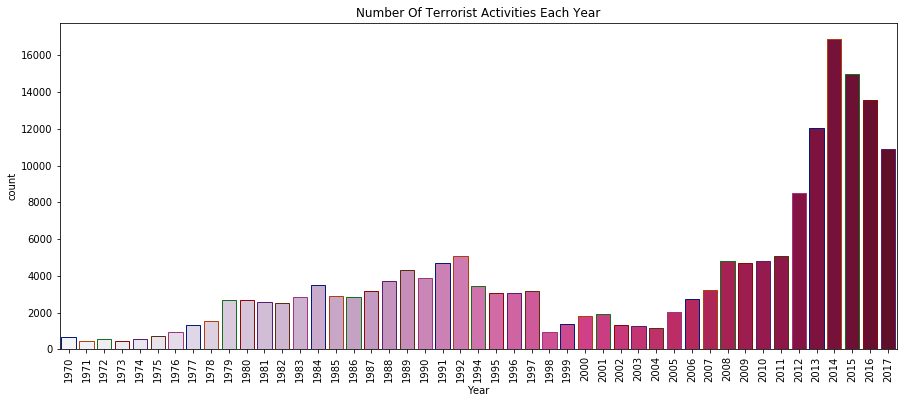

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='PuRd',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

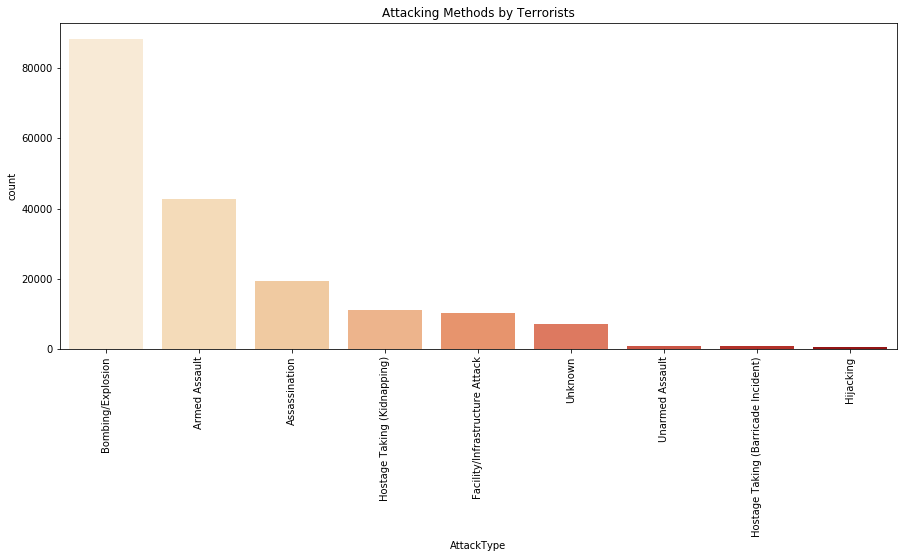

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='OrRd',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

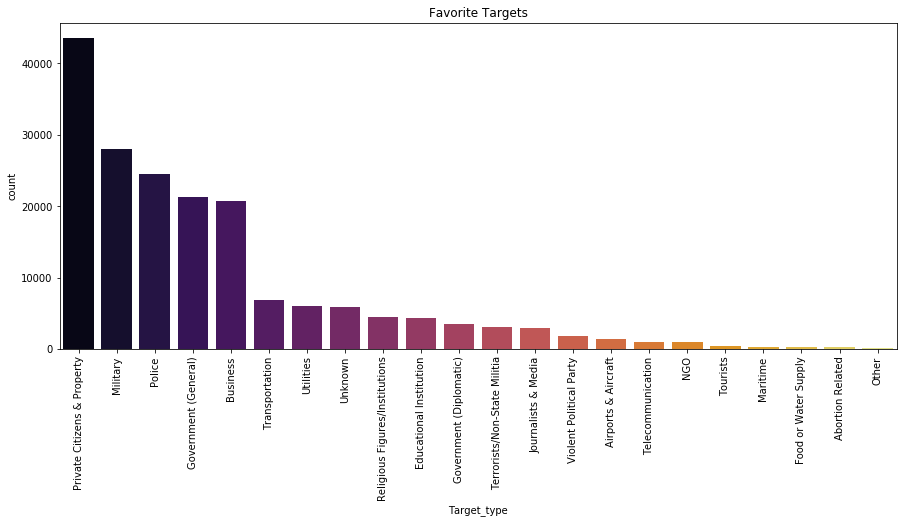

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

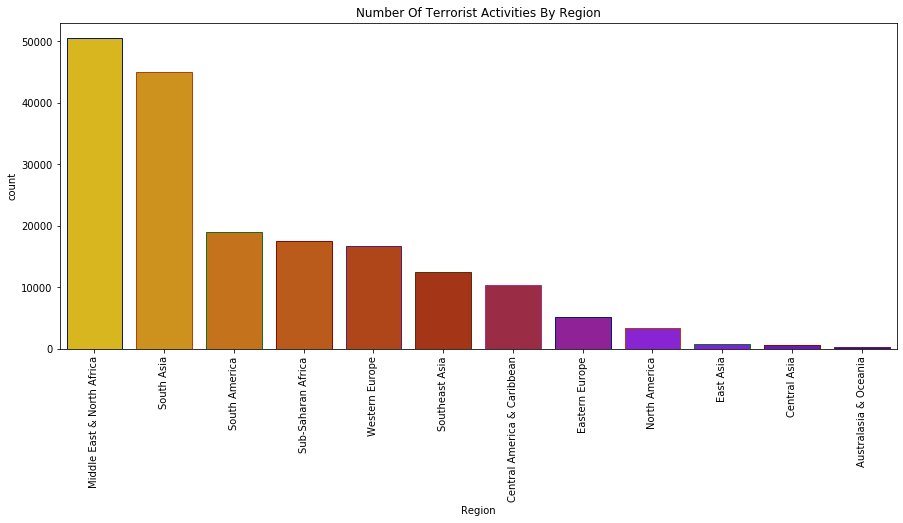

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='gnuplot_r',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

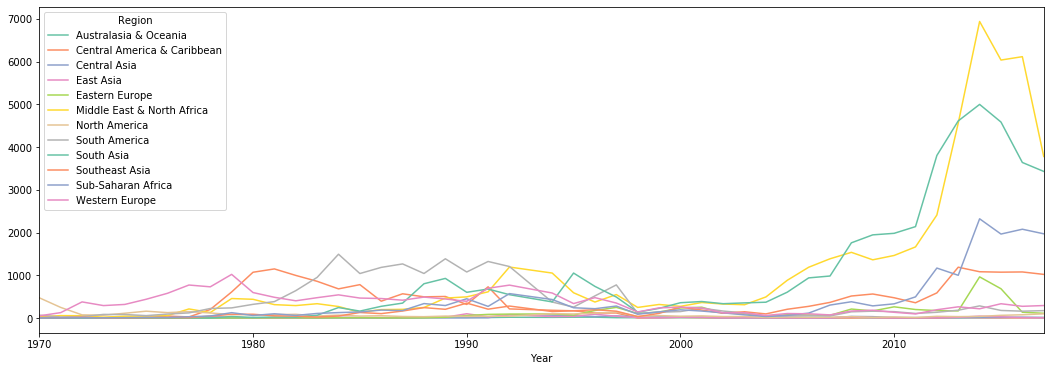

In [14]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

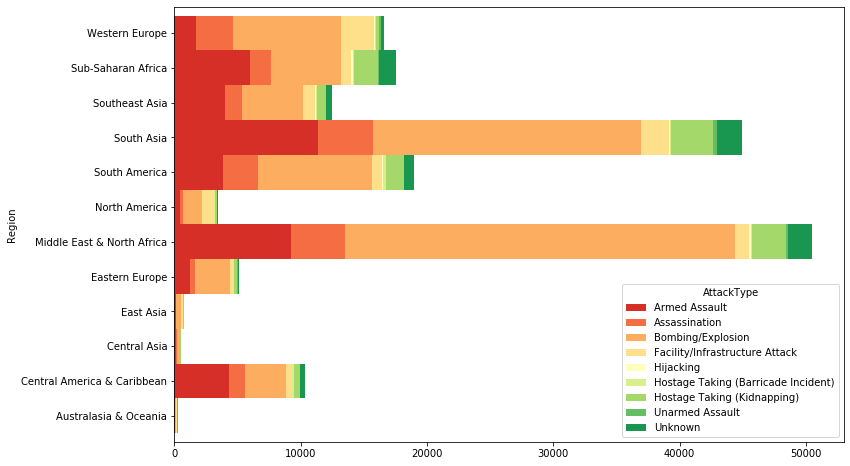

In [15]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

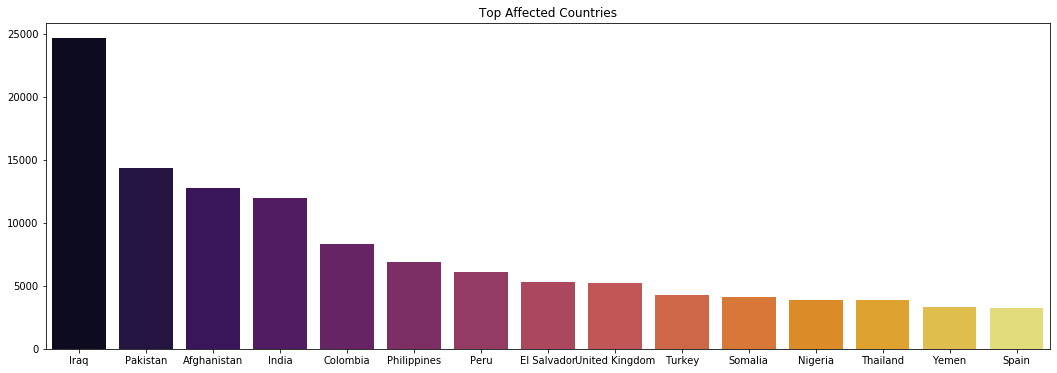

In [16]:
plt.subplots(figsize=(18,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

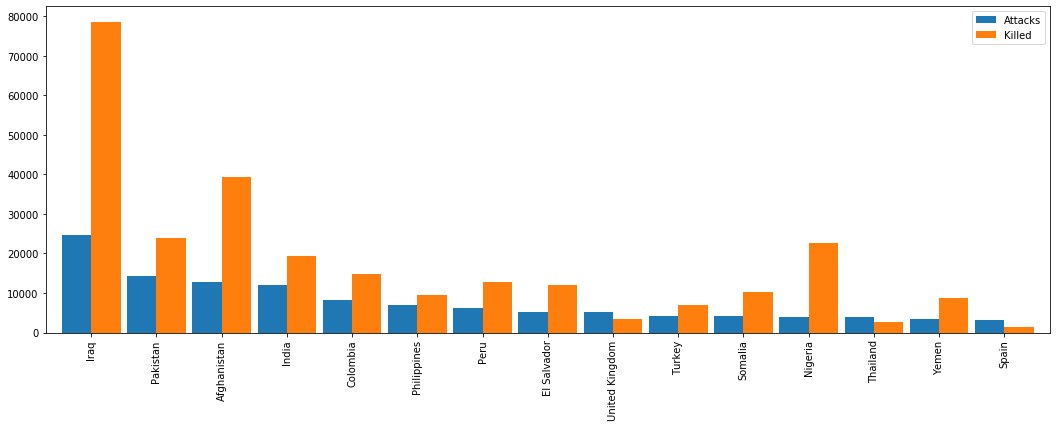

In [17]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

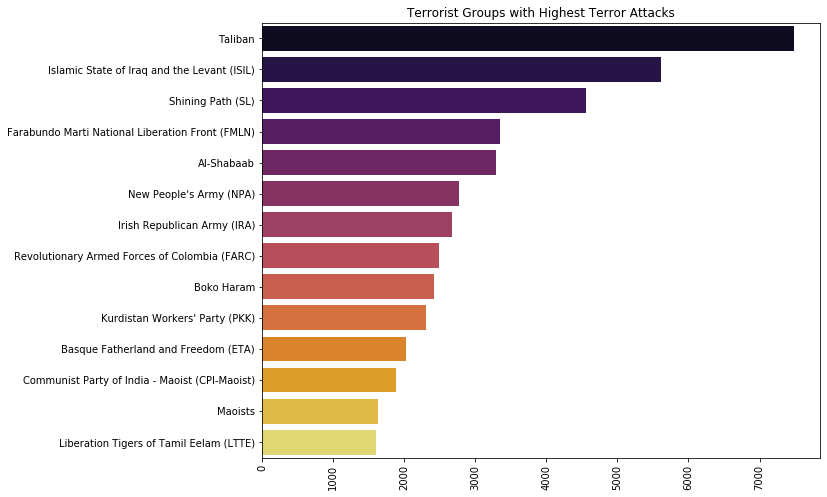

In [18]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

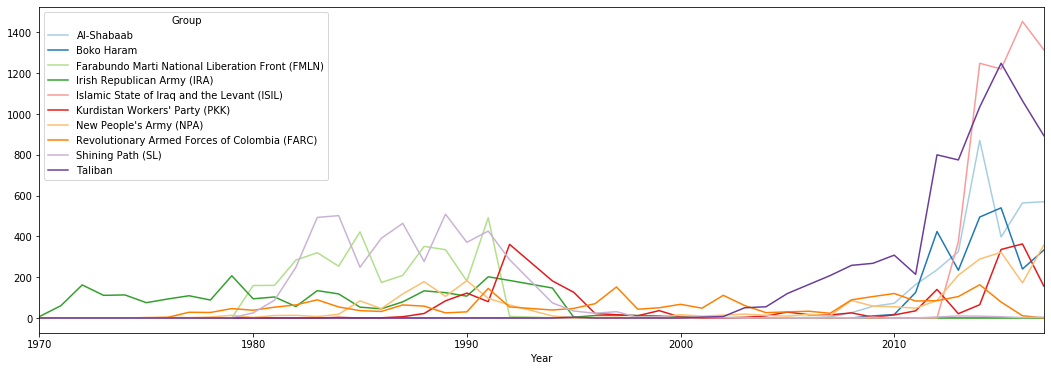

In [19]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [22]:
terror_india=terror[terror['Country']=='India']
terror_india_fol=terror_india.copy()
terror_india_fol.dropna(subset=['Latitude','Longitude'],inplace=True)
location_ind=terror_india_fol[['Latitude','Longitude']][:5000]
city_ind=terror_india_fol['City'][:5000]
killed_ind=terror_india_fol['Killed'][:5000]
wound_ind=terror_india_fol['Wounded'][:5000]
target_ind=terror_india_fol['Target_type'][:5000]

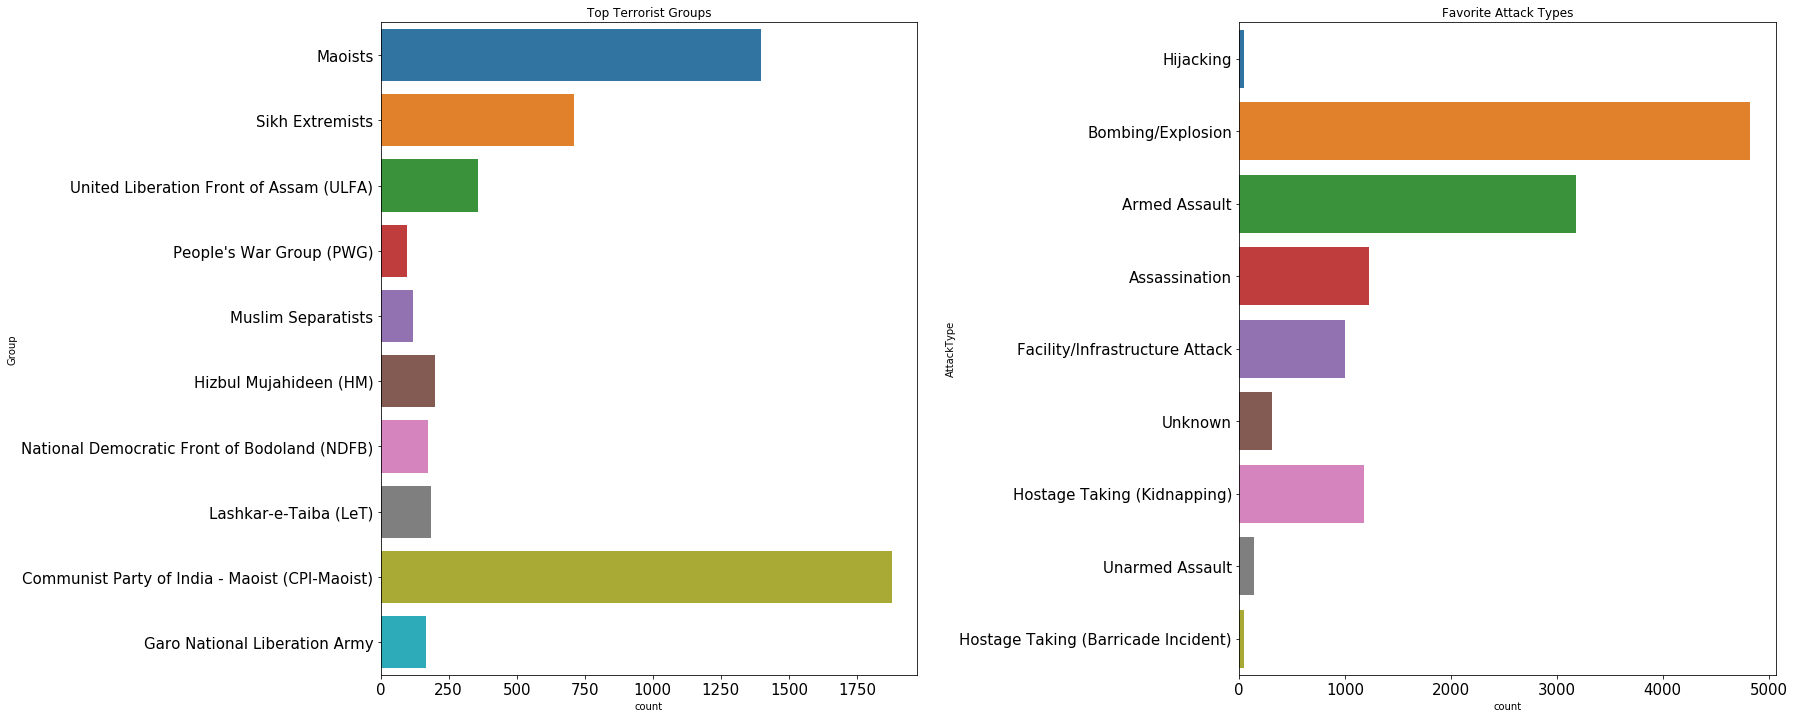

In [23]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [24]:
terror_usa=terror[terror['Country']=='United States']
terror_usa_fol=terror_usa.copy()
terror_usa_fol.dropna(subset=['Latitude','Longitude'],inplace=True)
location_usa=terror_usa_fol[['Latitude','Longitude']]
city_usa=terror_usa_fol['City']
killed_usa=terror_usa_fol['Killed']
wound_usa=terror_usa_fol['Wounded']
target_usa=terror_usa_fol['Target_type']

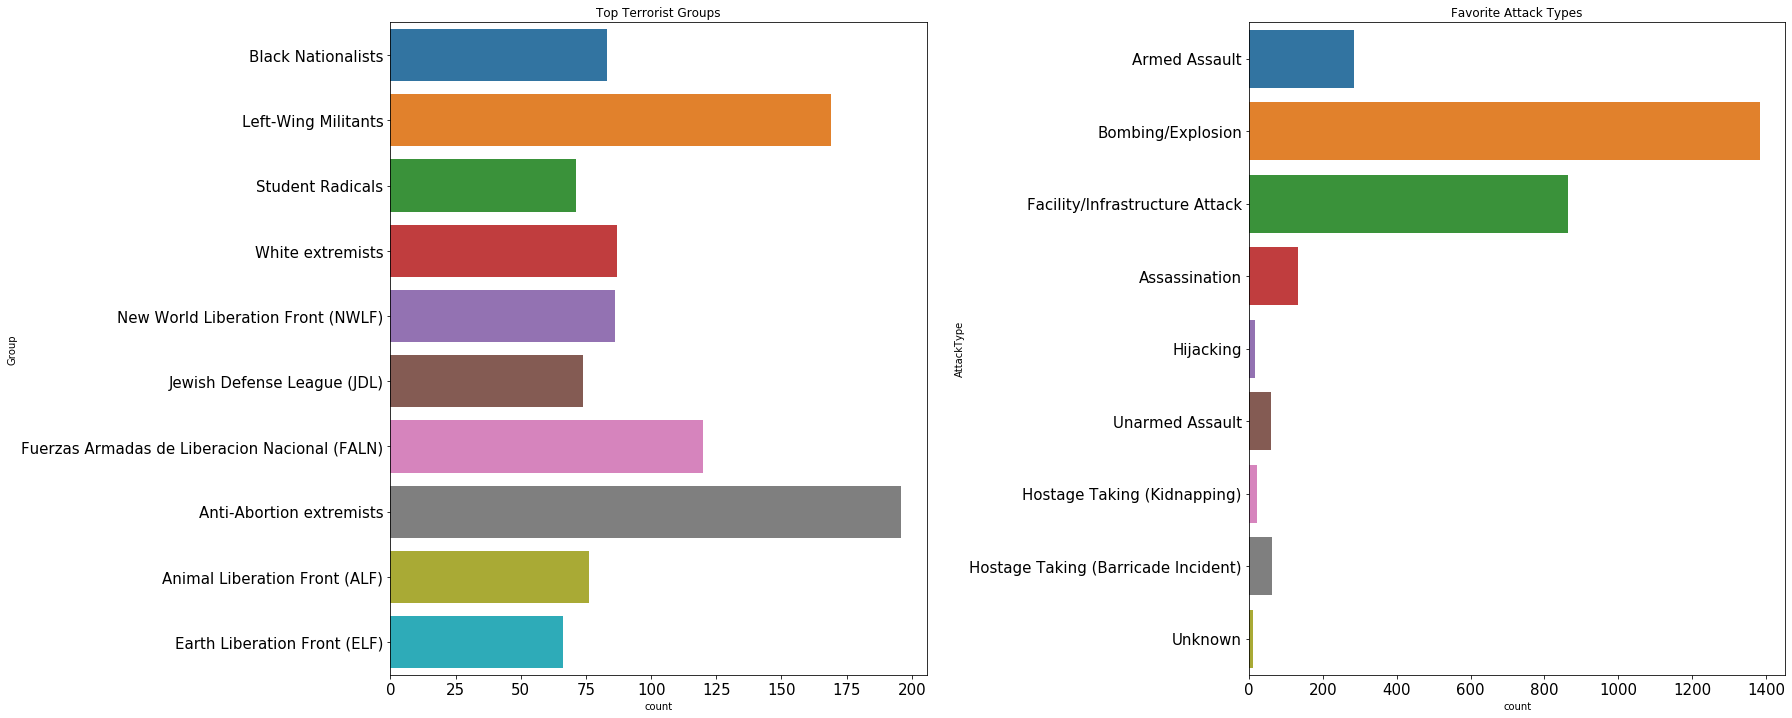

In [25]:
f,ax=plt.subplots(1,2,figsize=(25,12))
usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [26]:
terror_fin=terror[terror['Country']=='Finland']
terror_fin_fol=terror_fin.copy()
terror_fin_fol.dropna(subset=['Latitude','Longitude'],inplace=True)
location_fin=terror_fin_fol[['Latitude','Longitude']]
city_fin=terror_fin_fol['City']
killed_fin=terror_fin_fol['Killed']
wound_fin=terror_fin_fol['Wounded']
target_fin=terror_fin_fol['Target_type']

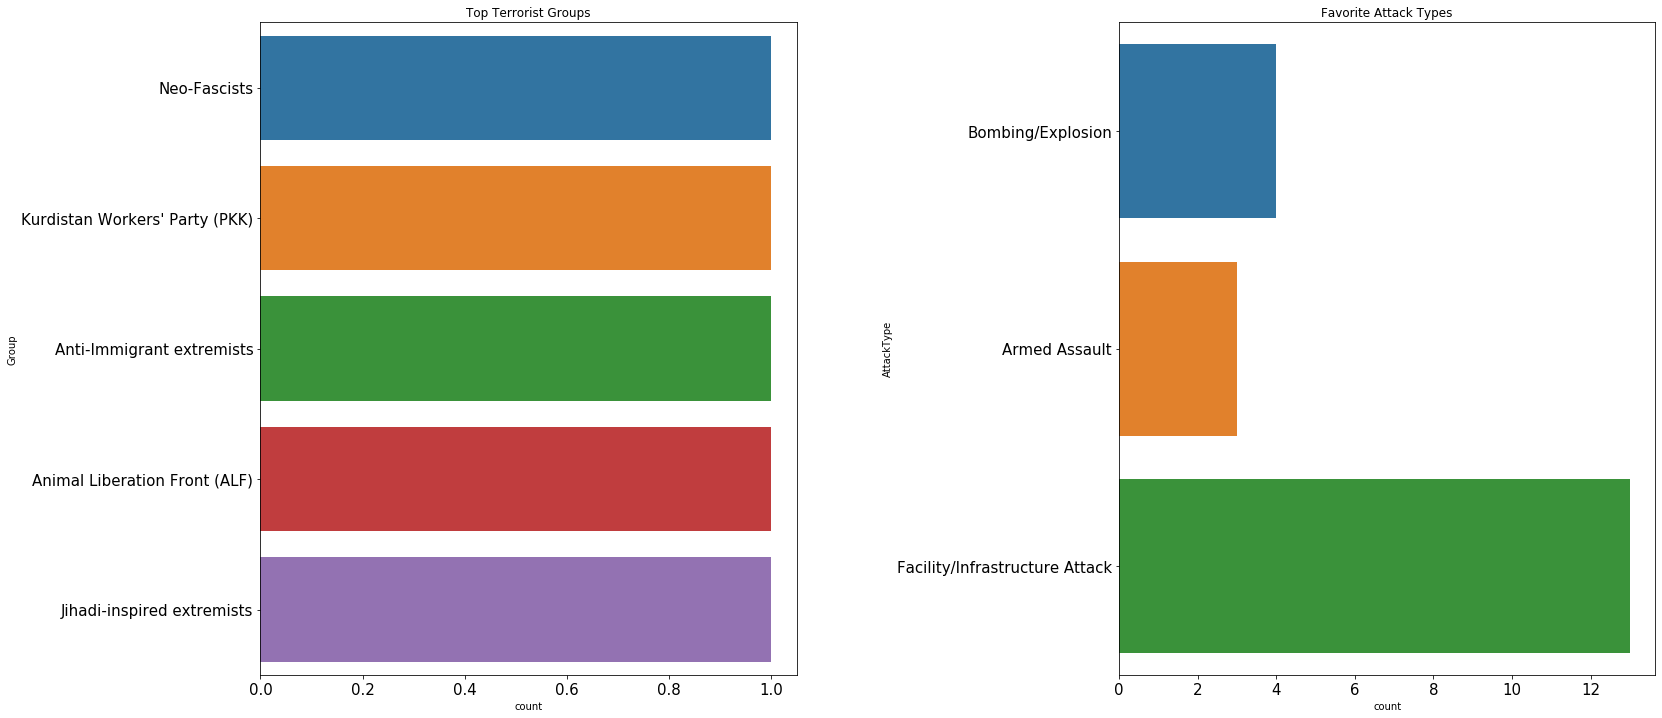

In [27]:
f,ax=plt.subplots(1,2,figsize=(25,12))
fin_groups=terror_fin['Group'].value_counts()[1:11].index
fin_groups=terror_fin[terror_fin['Group'].isin(fin_groups)]
sns.countplot(y='Group',data=fin_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_fin,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()